This section focuses on **Exploratory Data Analysis (EDA)** to uncover insights from the data, with the following objectives:

Enhance our understanding of the dataset.
Select features that are most suitable for building the model.
Identify key factors that can drive organizational value.
EDA is a highly valuable process. Let’s dive in!

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualization
import scipy.stats as stats  # For performing statistical tests and calculations
import statsmodels.api as sm  # For statistical models and hypothesis testing
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numerical values

# Suppress warnings
import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # Ignore all warnings to keep the output clean


In [3]:
# Load the cleaned dataset
df = pd.read_csv('loan_cleaned.csv')
df.head()  # Display the first 5 rows of the dataset

,applicant_id,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [4]:
# Drop the 'applicant_id' column as it is not relevant for analysis
df.drop('applicant_id', axis=1, inplace=True)
df.head()  # Confirm that the column has been dropped

,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,annual_income,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
0,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [5]:
# Display dataset information, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49719 entries, 0 to 49718
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      49719 non-null  object 
 1   age                         49719 non-null  int64  
 2   marital_status              49719 non-null  object 
 3   dependents                  49719 non-null  int64  
 4   education                   49719 non-null  object 
 5   employment_status           49719 non-null  object 
 6   occupation_type             49719 non-null  object 
 7   residential_status          49719 non-null  object 
 8   city/town                   49719 non-null  object 
 9   annual_income               49719 non-null  int64  
 10  monthly_expenses            49719 non-null  int64  
 11  credit_score                49719 non-null  int64  
 12  existing_loans              49719 non-null  int64  
 13  total_existing_loan_amount  497

## Insights from the Label Distribution

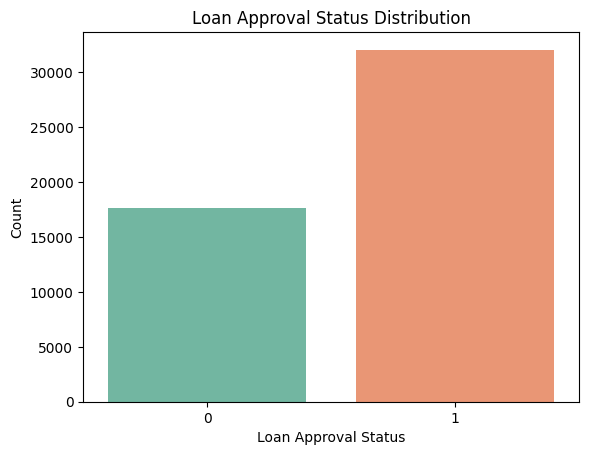

In [6]:
# Plot the distribution of loan approval status
sns.countplot(x='loan_approval_status', data=df, palette='Set2') 
plt.xlabel('Loan Approval Status')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Loan Approval Status Distribution')  # Plot title
plt.show()

From the graph, it is evident that the label distribution is **imbalanced**. In such cases, it’s important to use suitable evaluation metrics. I chose **F1-score** as it is well-suited for assessing models with imbalanced data. This metric will serve as the primary evaluation method for this project.

## Data Distribution Observations

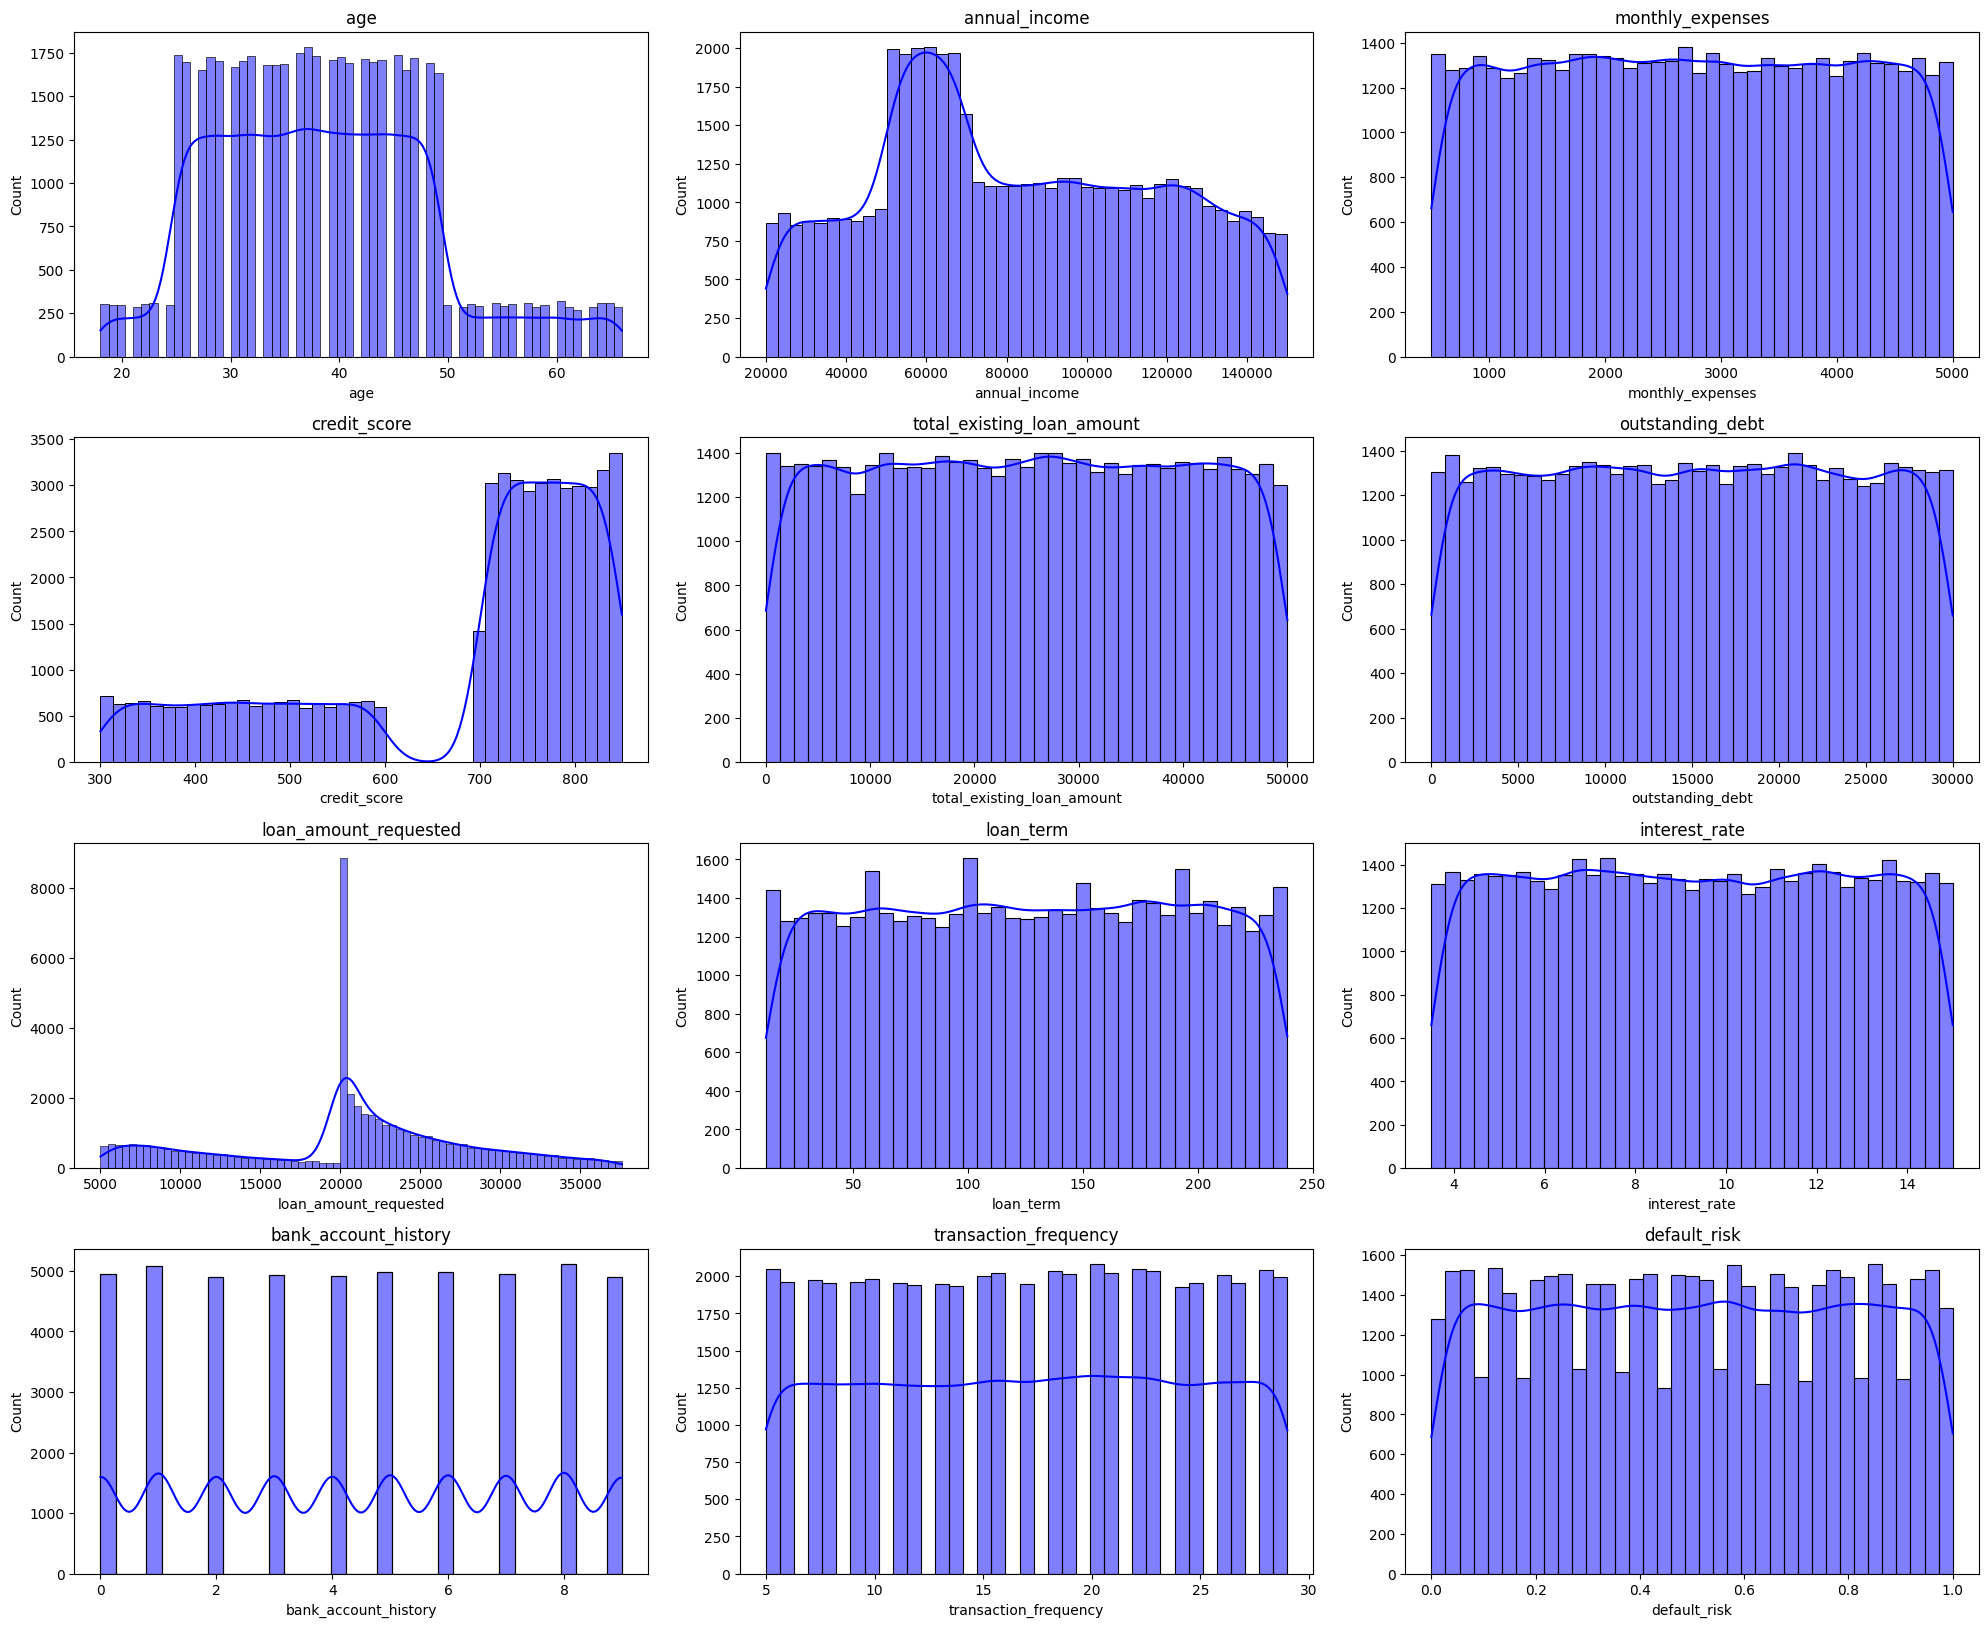

In [7]:
# Visualize the distribution of numerical features
distribution_features = [ 
    'age', 'annual_income', 'monthly_expenses', 'credit_score', 
    'total_existing_loan_amount', 'outstanding_debt',
    'loan_amount_requested', 'loan_term', 'interest_rate', 
    'bank_account_history', 'transaction_frequency', 'default_risk',
]
plt.figure(figsize=(20, 20))  # Set the figure size for the histograms

for i, col in enumerate(distribution_features, 1):
    plt.subplot(5, 3, i)  # Create a grid of subplots (5 rows, 3 columns)
    sns.histplot(df[col], kde=True, color='blue')  # Plot histogram with KDE
    plt.title(col)  # Set the title for each subplot
    plt.xlabel(col)  # Label the x-axis

plt.tight_layout()  # Adjust subplot spacing
plt.show()

* Age:
    * The distribution is uniform for ages between approximately 25 and 50 years.
    * A noticeable decline in data points occurs for ages above 50.
* Annual Income:
    * The distribution is left-skewed.
    * Most income values fall between 40,000 and 80,000, with fewer records above 120,000.
* Monthly Expenses:
    * The distribution is relatively uniform across the range of 1,000–5,000.
* Credit Score:
    * A bimodal distribution is observed.
    * One group has credit scores below 600, while another group has scores above 700.
* Total Existing Loan Amount:
    * The data is uniformly distributed between 0 and 50,000.
* Outstanding Debt:
    * The distribution is uniform across 0–30,000 without any notable peaks.
* Loan Amount Requested:
    * A peaked distribution is observed at around 25,000.
    * Most records are within the range of 5,000–40,000.
* Loan Term:
    * Uniformly distributed across 0–250 months.
* Interest Rate:
    * Uniformly distributed between 4%–14%.
* Bank Account History:
    * The data has a clear wave-like pattern and is evenly distributed within specific intervals.
* Transaction Frequency:
    * Uniformly distributed within the range of 5–30.
* Default Risk:
    * Fairly uniform across 0 to 1.

## Box Plot Analysis for Continuous Features

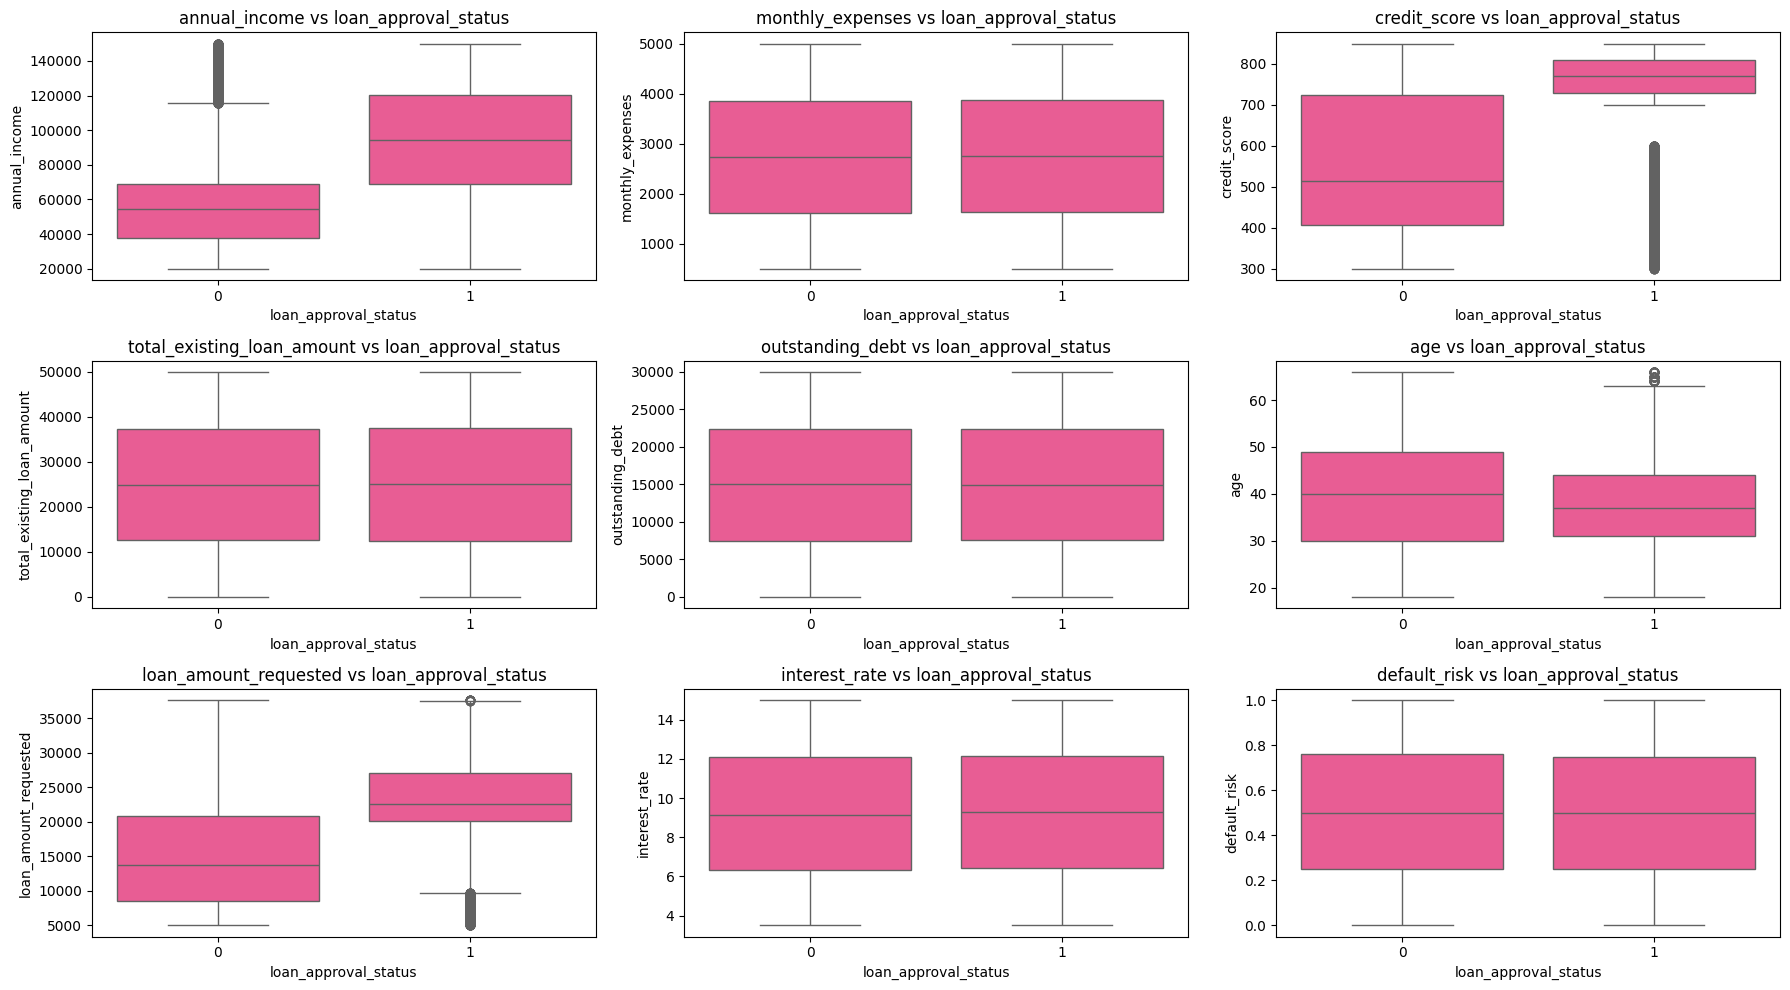

In [8]:
# Create boxplots to analyze numerical features against loan approval status
# 3 rows x 3 columns of subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# List of numerical features to analyze
features = [
    'annual_income', 'monthly_expenses', 'credit_score',
    'total_existing_loan_amount', 'outstanding_debt', 'age',
    'loan_amount_requested', 'interest_rate', 'default_risk'
]

# Loop to create boxplots for each feature
for idx, feature in enumerate(features):
    row = idx // 3  # Determine the subplot row
    col = idx % 3   # Determine the subplot column

    sns.boxplot(
        x='loan_approval_status', 
        y=feature, 
        data=df, 
        color='#FF468F',  # Set the boxplot color
        ax=ax[row, col]  # Assign subplot location
    )
    ax[row, col].set_title(f'{feature} vs loan_approval_status')  # Set title

plt.tight_layout()  # Adjust layout for readability
plt.show()

In [9]:
# Compute mean values of selected features grouped by loan approval status
df.groupby('loan_approval_status')[['annual_income', 'credit_score', 'loan_amount_requested', 'age']].mean()


,annual_income,credit_score,loan_amount_requested,age
loan_approval_status,,,,
0,60668.202105,546.928765,15367.913149,40.439912
1,94697.445436,752.128632,23680.655172,37.334093


I created box plots to analyze the differences in continuous numerical features (int and float types) across the two label groups (0 and 1).

From the graphs, most features show no significant differences between labels 0 and 1, except for these four features:

* Annual Income
* Credit Score
* Age
* Loan Amount Requested
These features display distinct values across the two label groups, suggesting that they are meaningful for analysis.

To enhance feature clarity, I created the following new features

1. Age Group:

    * Grouped ages into career lifecycle stages:
        * 18–24: Young Adult
        * 25–39: Middle Adult
        * 40–55: Middle Age
        * 56–66: Early Retirement
    This grouping was derived from the distribution of the Age feature.
2. Transaction Frequency Level:

    * Categorized transaction frequency into three levels:
        * Low
        * Medium
        * High

In [10]:
# Create new categorical columns based on ranges for specific features
# Age groups based on age ranges
df['age_group'] = pd.cut(df['age'], bins=[17, 24, 39, 55, float('inf')], 
                         labels=['Young Adult', 'Middle Adult', 'Middle Age', 'Early Retirement'])

# Transaction frequency levels based on custom ranges
df['trans_freq_level'] = pd.cut(df['transaction_frequency'], bins=[5, 17, 23, float('inf')], 
                                labels=['Low', 'Medium', 'High'])

## Categorical Feature Analysis

Next, I plotted graphs to analyze how categorical features relate to label 0 and 1.

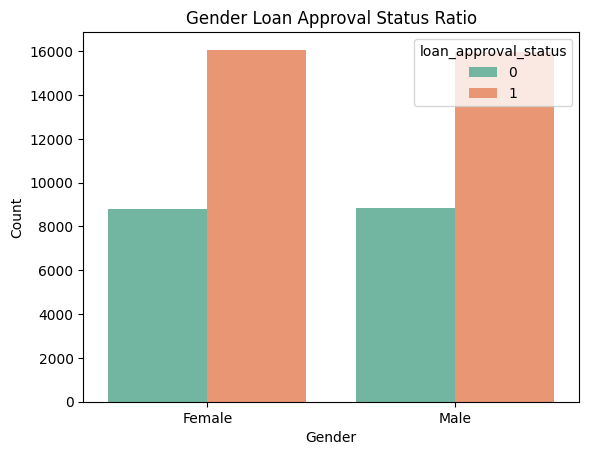

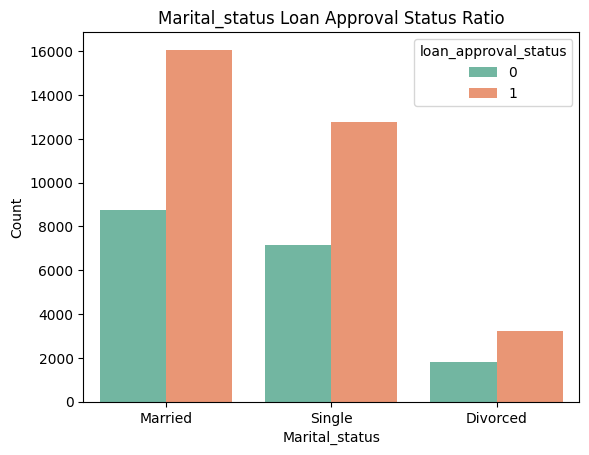

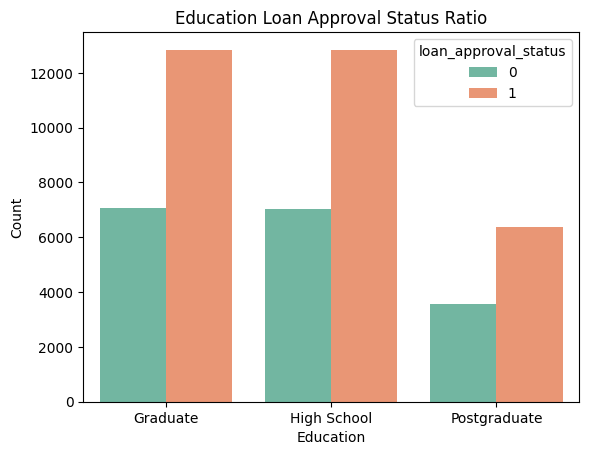

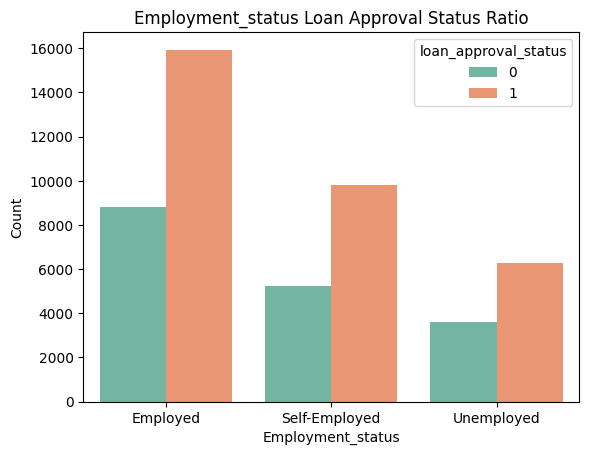

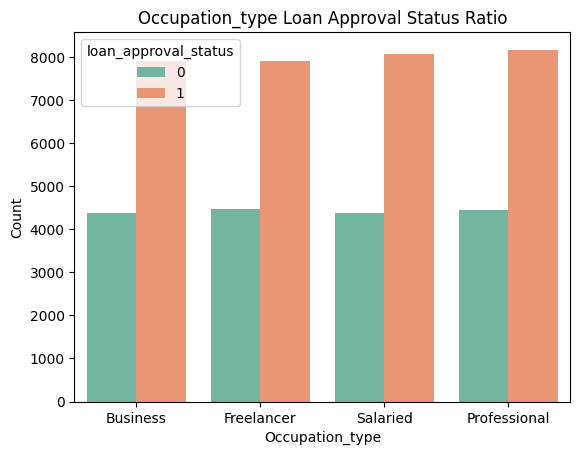

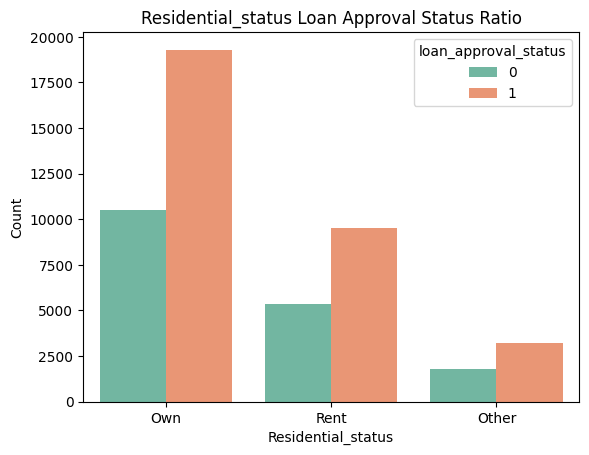

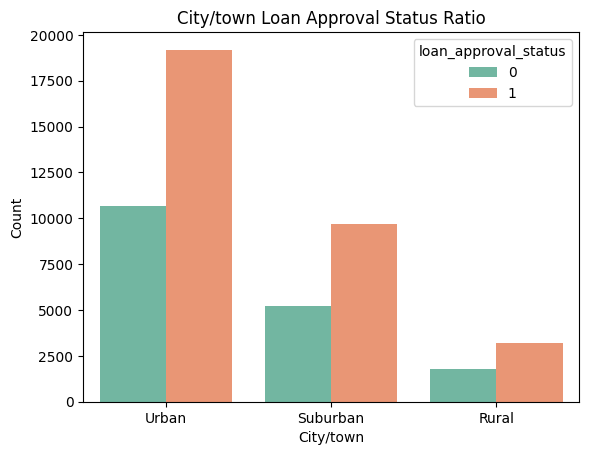

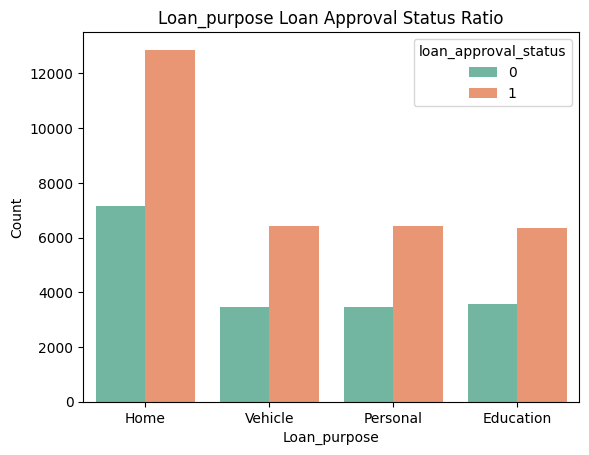

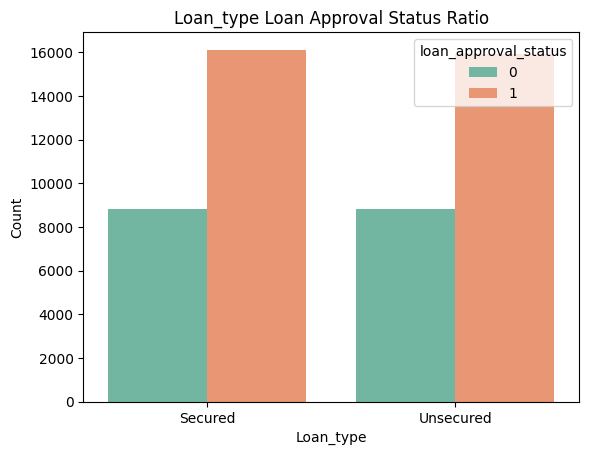

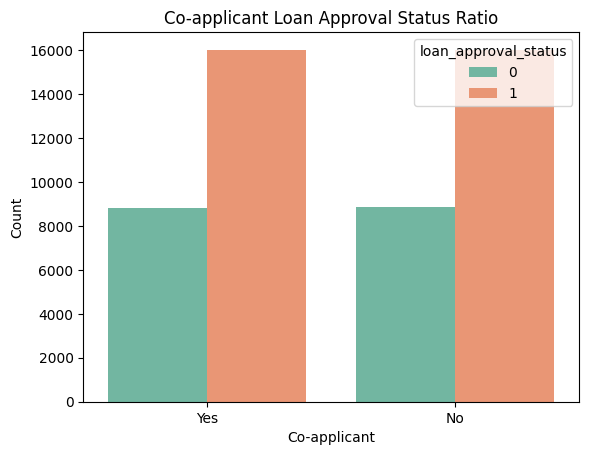

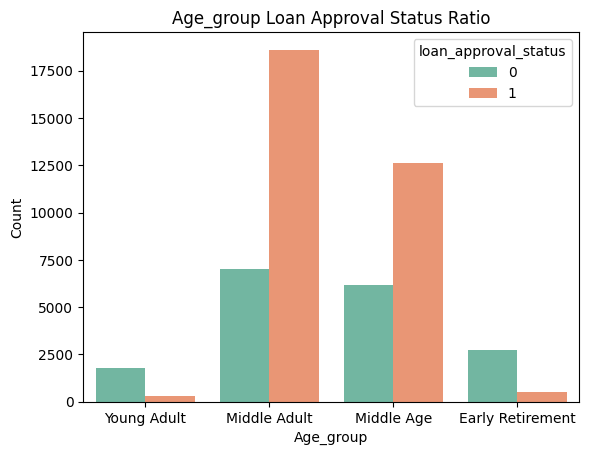

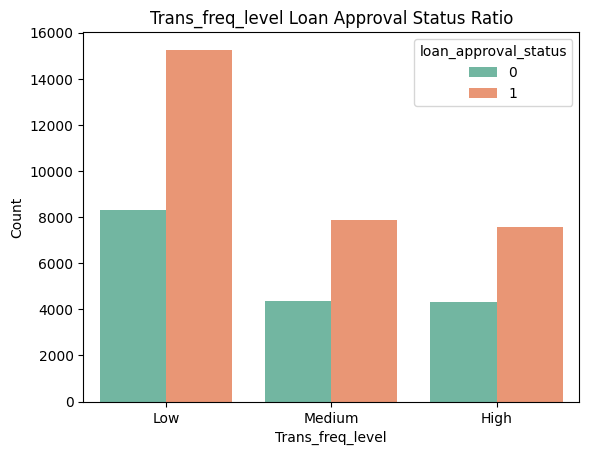

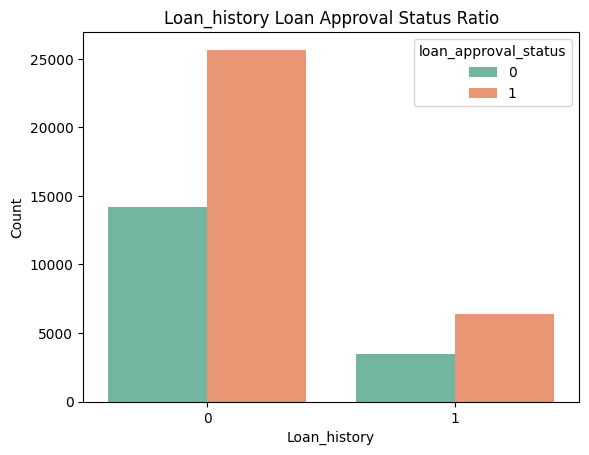

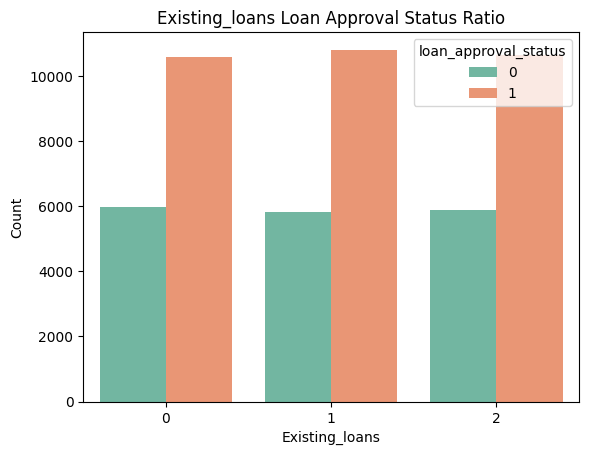

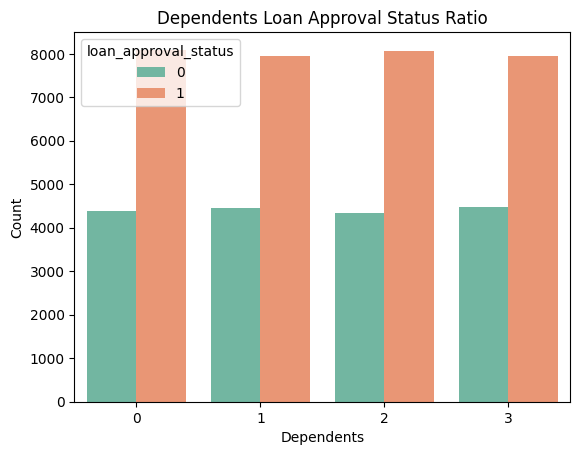

In [11]:
# Identify categorical features
catg_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Add specific columns for analysis
catg_features.extend(['loan_history', 'existing_loans', 'dependents'])

# Loop to create count plots for each categorical feature
for col in catg_features:
    col_title = col.capitalize()  # Capitalize column name for display

    # Plot count of values grouped by loan approval status
    sns.countplot(x=col, data=df, palette='Set2', hue='loan_approval_status')
    
    plt.xlabel(col_title)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.title(f'{col_title} Loan Approval Status Ratio')  # Set plot title
    
    plt.show()  # Display the plot

From the plots, significant differences in approval status proportions were observed for the following features:

* Employment Status
* Residential Status
* City/Town
* Age Group

These features show meaningful variations across labels, making them valuable for further analysis.

## Chi-Square Test for Categorical Features

In this step, I used the Chi-Square test to assess the relationship between the label and all categorical features in the dataset.


In [12]:
# Define the list of categorical columns
categorical_columns = [
    'gender', 'marital_status', 'education', 'employment_status', 
    'occupation_type', 'residential_status', 'city/town', 'loan_purpose',
    'loan_type', 'co-applicant', 'loan_history', 'existing_loans', 
    'dependents', 'age_group', 'trans_freq_level'
]

# Perform Chi-Square Test to check relationships between categorical features and the target
def chi_square_test(df, column, target):
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df[target])
    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Check significance (p < 0.05)
    if p < 0.05:
        print(f"Reject H0: There is a significant relationship between {column} and {target}.")
        print('*' * 50)

# Loop through categorical columns and run the Chi-Square Test
for column in categorical_columns:
    chi_square_test(df, column, 'loan_approval_status')

Reject H0: There is a significant relationship between employment_status and loan_approval_status.
**************************************************
Reject H0: There is a significant relationship between age_group and loan_approval_status.
**************************************************


The test results revealed that **employment_status** and **age_group** have a significant relationship with the label. These two features will be included in the model.

## Regression Analysis

Based on previous observations, the average credit score differs significantly between approved and rejected loan applications. This suggests that credit score plays a key role in loan approval status.

To explore what factors influence credit score, I conducted a regression analysis, excluding features such as loan_approval_status, loan_amount_requested, loan_purpose, and interest_rate (as these are outcomes of processes dependent on credit score).

In [ ]:
# Copy the dataset for regression analysis
df_reg = df.copy()

# Encode categorical features using LabelEncoder for regression
encoder = LabelEncoder()
for col in categorical_columns:
    df_reg[col] = encoder.fit_transform(df_reg[col])

# Define the target variable
y = df_reg['credit_score']

# Define the features by excluding certain columns
X = df_reg.drop(columns=['credit_score', 'loan_approval_status', 'loan_amount_requested', 'loan_purpose','interest_rate'])

# Add a constant term for regression
X = sm.add_constant(X)

# Fit an OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary for statistical interpretation
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1564.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:51:12   Log-Likelihood:            -3.0877e+05
No. Observations:               49719   AIC:                         6.176e+05
Df Residuals:                   49694   BIC:                         6.178e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The results indicate that **age** and **annual_income** significantly affect credit score, as shown by statistically significant p-values. However, when feeding data into the model, I will exclude age and annual_income, as credit score already encapsulates the effects of these features. This will reduce redundancy in calculations.

## Feature Engineering

To improve analysis efficiency, I created the following new features:

* **diff_income_to_expenses:** Calculates the difference between income and monthly expenses to understand the financial surplus.
* **debt_to_income_ratio:** Indicates the ratio of debt to income, providing insights into financial stability.
* **loan_to_value_ratio:** Compares the loan amount requested to the applicant's income to measure the proportion of the loan relative to their income.

While there might be better approaches, these initial features aim to improve the understanding and analysis of the data.

In [14]:
# Create new derived features for analysis
df['diff_income_to_expenses'] = (df['annual_income'] / 12) - df['monthly_expenses']  # Income left after expenses
df['debt_to_income_ratio'] = df['outstanding_debt'] / df['annual_income']  # Debt-to-income ratio
df['loan_to_value_ratio'] = df['loan_amount_requested'] / df['annual_income']  # Loan-to-income ratio

## Analysis of Loan-to-Value Ratio

I analyzed the **loan_to_value_ratio** to understand typical loan amounts granted.



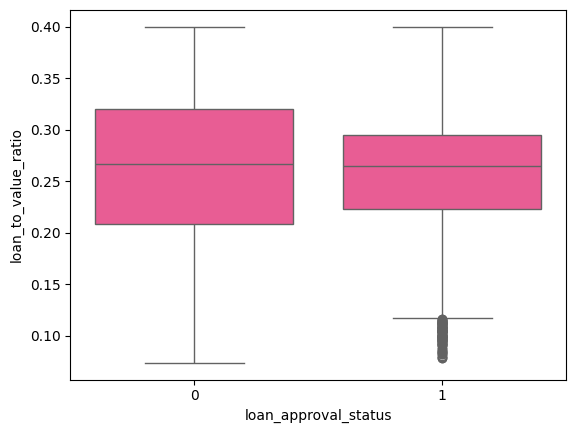

In [15]:
# Visualize the relationship between loan-to-value ratio and loan approval status
sns.boxplot(
    x='loan_approval_status', 
    y='loan_to_value_ratio', 
    data=df, 
    color='#FF468F'
)
plt.show()

In [16]:
# Group by loan approval status and calculate the mean of loan-to-value ratio
df.groupby('loan_approval_status')[['loan_to_value_ratio']].mean()

,loan_to_value_ratio
loan_approval_status,
0,0.262899
1,0.262484


The results show that the average loan-to-value ratio for approved and rejected applications is nearly identical. However, examining the interquartile range (IQR) reveals a difference because Approved loans have a narrower IQR compared to rejected loans.

## Correlation Analysis
Next, I calculated the **correlation** for numerical features to assess the strength and intensity of their relationships.

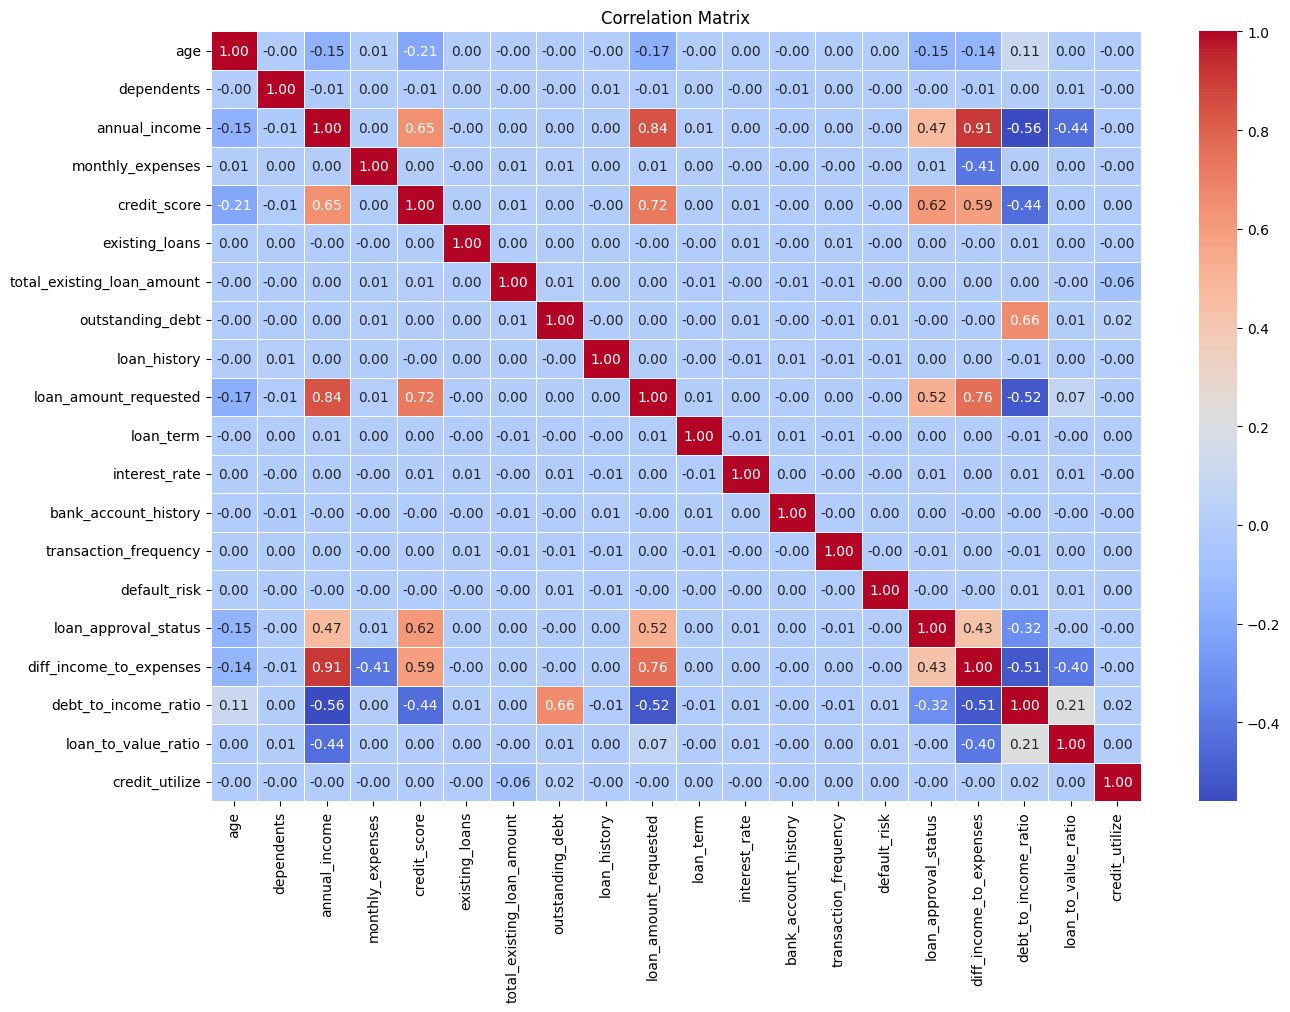

In [17]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the graph, we can observe the correlations as follows:

#### **1. Annual Income**
- **Correlations:**
  - `Loan Amount Requested`: **0.84** (Strong positive correlation)
  - `Credit Score`: **0.65** (Moderate positive correlation)
  - `Diff Income to Expenses`: **0.91** (Strong positive correlation)
- **Interpretation:**
  - Higher annual income is strongly associated with higher loan requests and better credit scores. Additionally, income significantly impacts the difference between income and expenses.

---

#### **2. Credit Score**
- **Correlations:**
  - `Loan Amount Requested`: **0.72** (Strong positive correlation)
  - `Default Risk`: **0.62** (Moderate positive correlation)
  - `Loan Approval Status`: **0.47** (Moderate positive correlation)
- **Interpretation:**
  - A higher credit score is associated with larger loan amounts, higher default risks, and increased chances of loan approval.

---

#### **3. Loan Amount Requested**
- **Correlations:**
  - `Annual Income`: **0.84** (Strong positive correlation)
  - `Credit Score`: **0.72** (Strong positive correlation)
  - `Total Existing Loan Amount`: **0.76** (Strong positive correlation)
- **Interpretation:**
  - Higher loan requests are linked with higher income, better credit scores, and greater existing loan amounts.

---

#### **4. Diff Income to Expenses**
- **Correlations:**
  - `Annual Income`: **0.91** (Strong positive correlation)
  - `Monthly Expenses`: **-0.59** (Moderate negative correlation)
- **Interpretation:**
  - The difference between income and expenses is strongly influenced by higher income and reduced monthly expenses.

---

#### **5. Default Risk**
- **Correlations:**
  - `Credit Score`: **0.62** (Moderate positive correlation)
- **Interpretation:**
  - Default risk is moderately related to credit scores, indicating that higher credit scores may slightly increase the risk of default.

---

#### **6. Debt to Income Ratio**
- **Correlations:**
  - `Outstanding Debt`: **0.66** (Moderate positive correlation)
- **Interpretation:**
  - A higher debt-to-income ratio is linked with greater outstanding debts.

---

#### **7. Loan to Value Ratio**
- **Correlations:**
  - `Total Existing Loan Amount`: **-0.44** (Moderate negative correlation)
- **Interpretation:**
  - The loan-to-value ratio decreases with higher total existing loan amounts.

---

### Summary
- **Strong Correlations**: 
  - `Annual Income`, `Loan Amount Requested`, and `Diff Income to Expenses` are key drivers in the dataset.
- **Moderate Correlations**:
  - Features like `Credit Score`, `Default Risk`, and `Debt to Income Ratio` have moderate but meaningful relationships with other features.
- **Negative Correlations**:
  - Only a few features, such as `Loan to Value Ratio` and `Monthly Expenses`, show moderate negative relationships.


Based on this, I decided to include **diff_income_to_expenses** and **debt_to_income_ratio** as they may enhance prediction accuracy.  


## Subgroup Analysis: Employment Status and Age Group

I compared approval probabilities by dividing the data into subgroups based on **employment_status** and **age_group** .

In [18]:
# Analyze loan approval status grouped by employment status and age group
df.groupby(['employment_status', 'age_group'])['loan_approval_status'].mean()

employment_status  age_group       
Employed           Young Adult         0.151544
                   Middle Adult        0.728803
                   Middle Age          0.666916
                   Early Retirement    0.166667
Self-Employed      Young Adult         0.167774
                   Middle Adult        0.727538
                   Middle Age          0.682870
                   Early Retirement    0.156413
Unemployed         Young Adult         0.153333
                   Middle Adult        0.716184
                   Middle Age          0.667995
                   Early Retirement    0.137825
Name: loan_approval_status, dtype: float64

The results show that approval probabilities are relatively similar across employment statuses, but applicants classified as Employed have slightly higher probabilities in all age groups compared to others.

Delving deeper into age subgroups reveals that individuals in the Middle Adult (25–39 years) group have the highest likelihood of loan approval. This is likely because this age group represents a financially productive period with a higher capacity to repay debt. Conversely, approval probabilities decline for younger or older applicants who are outside this financially productive range.

In [20]:
# Save the selected features DataFrame to a CSV file
df.to_csv('loan_analyzed.csv', index=False)